---
# **Modelagem e Otimização do Fluxo de Tráfego em Ambientes Urbanos utilizando Car-Following Models**
---

# **(I) Resumo**
---
Este projeto foca na modelagem e otimização do fluxo de tráfego em ambientes urbanos utilizando *Car-Following Models*. Inicialmente, implementamos o *Optimal Velocity Model (OVM)* para investigar o impacto de diferentes parâmetros no comportamento do tráfego e explorar estratégias para reduzir congestionamentos. Com base nos resultados dessa implementação, avançamos para o *Intelligent Driver Model (IDM)*, que permite uma análise mais detalhada e realista das interações entre veículos. A combinação desses modelos oferece uma perspectiva mais robusta para melhorar a eficiência e a segurança do tráfego, fornecendo *insights* valiosos para o desenvolvimento de sistemas de transporte inteligentes e políticas de gestão de tráfego urbano.

# **(II) Introdução e Objetivos**
---
O congestionamento de tráfego é um problema recorrente em áreas urbanas ao redor do mundo, resultando no aumento dos tempos de viagem, maior consumo de combustível e poluição do ar. Com o crescimento contínuo da população urbana e do número de veículos, torna-se cada vez mais crucial desenvolver métodos eficazes para otimizar o fluxo de tráfego e mitigar os problemas associados.

A motivação para o nosso projeto reside na necessidade urgente de soluções que possam aliviar o congestionamento em áreas urbanas densamente povoadas. Ao compreender melhor as dinâmicas de tráfego e testar estratégias de controle, podemos contribuir para a criação de sistemas de transporte mais eficientes e seguros. Isso não só beneficiará os motoristas ao reduzir o tempo de viagem e o estresse, mas também terá um impacto positivo no meio ambiente ao diminuir as emissões de gases poluentes.

Nosso projeto se concentra na modelagem e otimização do fluxo de tráfego em ambientes urbanos utilizando *Car-Following Models*. Esses modelos são amplamente empregados na teoria do tráfego para descrever como um veículo ajusta sua velocidade com base na distância para o veículo à frente. Iniciamos o projeto utilizando o *Optimal Velocity Model (OVM)* para simular o comportamento dinâmico de veículos em uma única faixa de trânsito e investigar como diferentes parâmetros influenciam o fluxo de tráfego. Posteriormente, avançamos para o *Intelligent Driver Model (IDM)*, que incorpora uma modelagem mais sofisticada das interações entre veículos, permitindo uma simulação mais realista e detalhada das condições de tráfego.

Os objetivos iniciais deste projeto foram:
* Implementar uma simulação numérica do *Optimal Velocity Model (OVM)* usando uma das funções de velocidade ótima propostas no livro *Traffic Flow Dynamics: Data, Models and Simulation*.
* Analisar o impacto de diferentes parâmetros do modelo no comportamento do tráfego, como a velocidade desejada e o tempo de adaptação do veículo.
* Explorar e avaliar estratégias de otimização, como controle de velocidade adaptativo e limites de velocidade variáveis, para reduzir congestionamentos e melhorar o fluxo de tráfego.

Após a implementação do OVM, integramos o *Intelligent Driver Model (IDM)* para refinar as análises e ampliar o escopo das estratégias de otimização. Com o IDM, podemos explorar interações mais complexas entre veículos, testando novas abordagens para o controle de tráfego e compreendendo de forma mais detalhada a formação e dissipação de congestionamentos em diferentes condições.

Esses objetivos continuam sendo avaliados através da observação detalhada de como congestionamentos se formam e se dissipam sob diferentes condições, utilizando experimentos computacionais para testar os parâmetros e estratégias propostos.

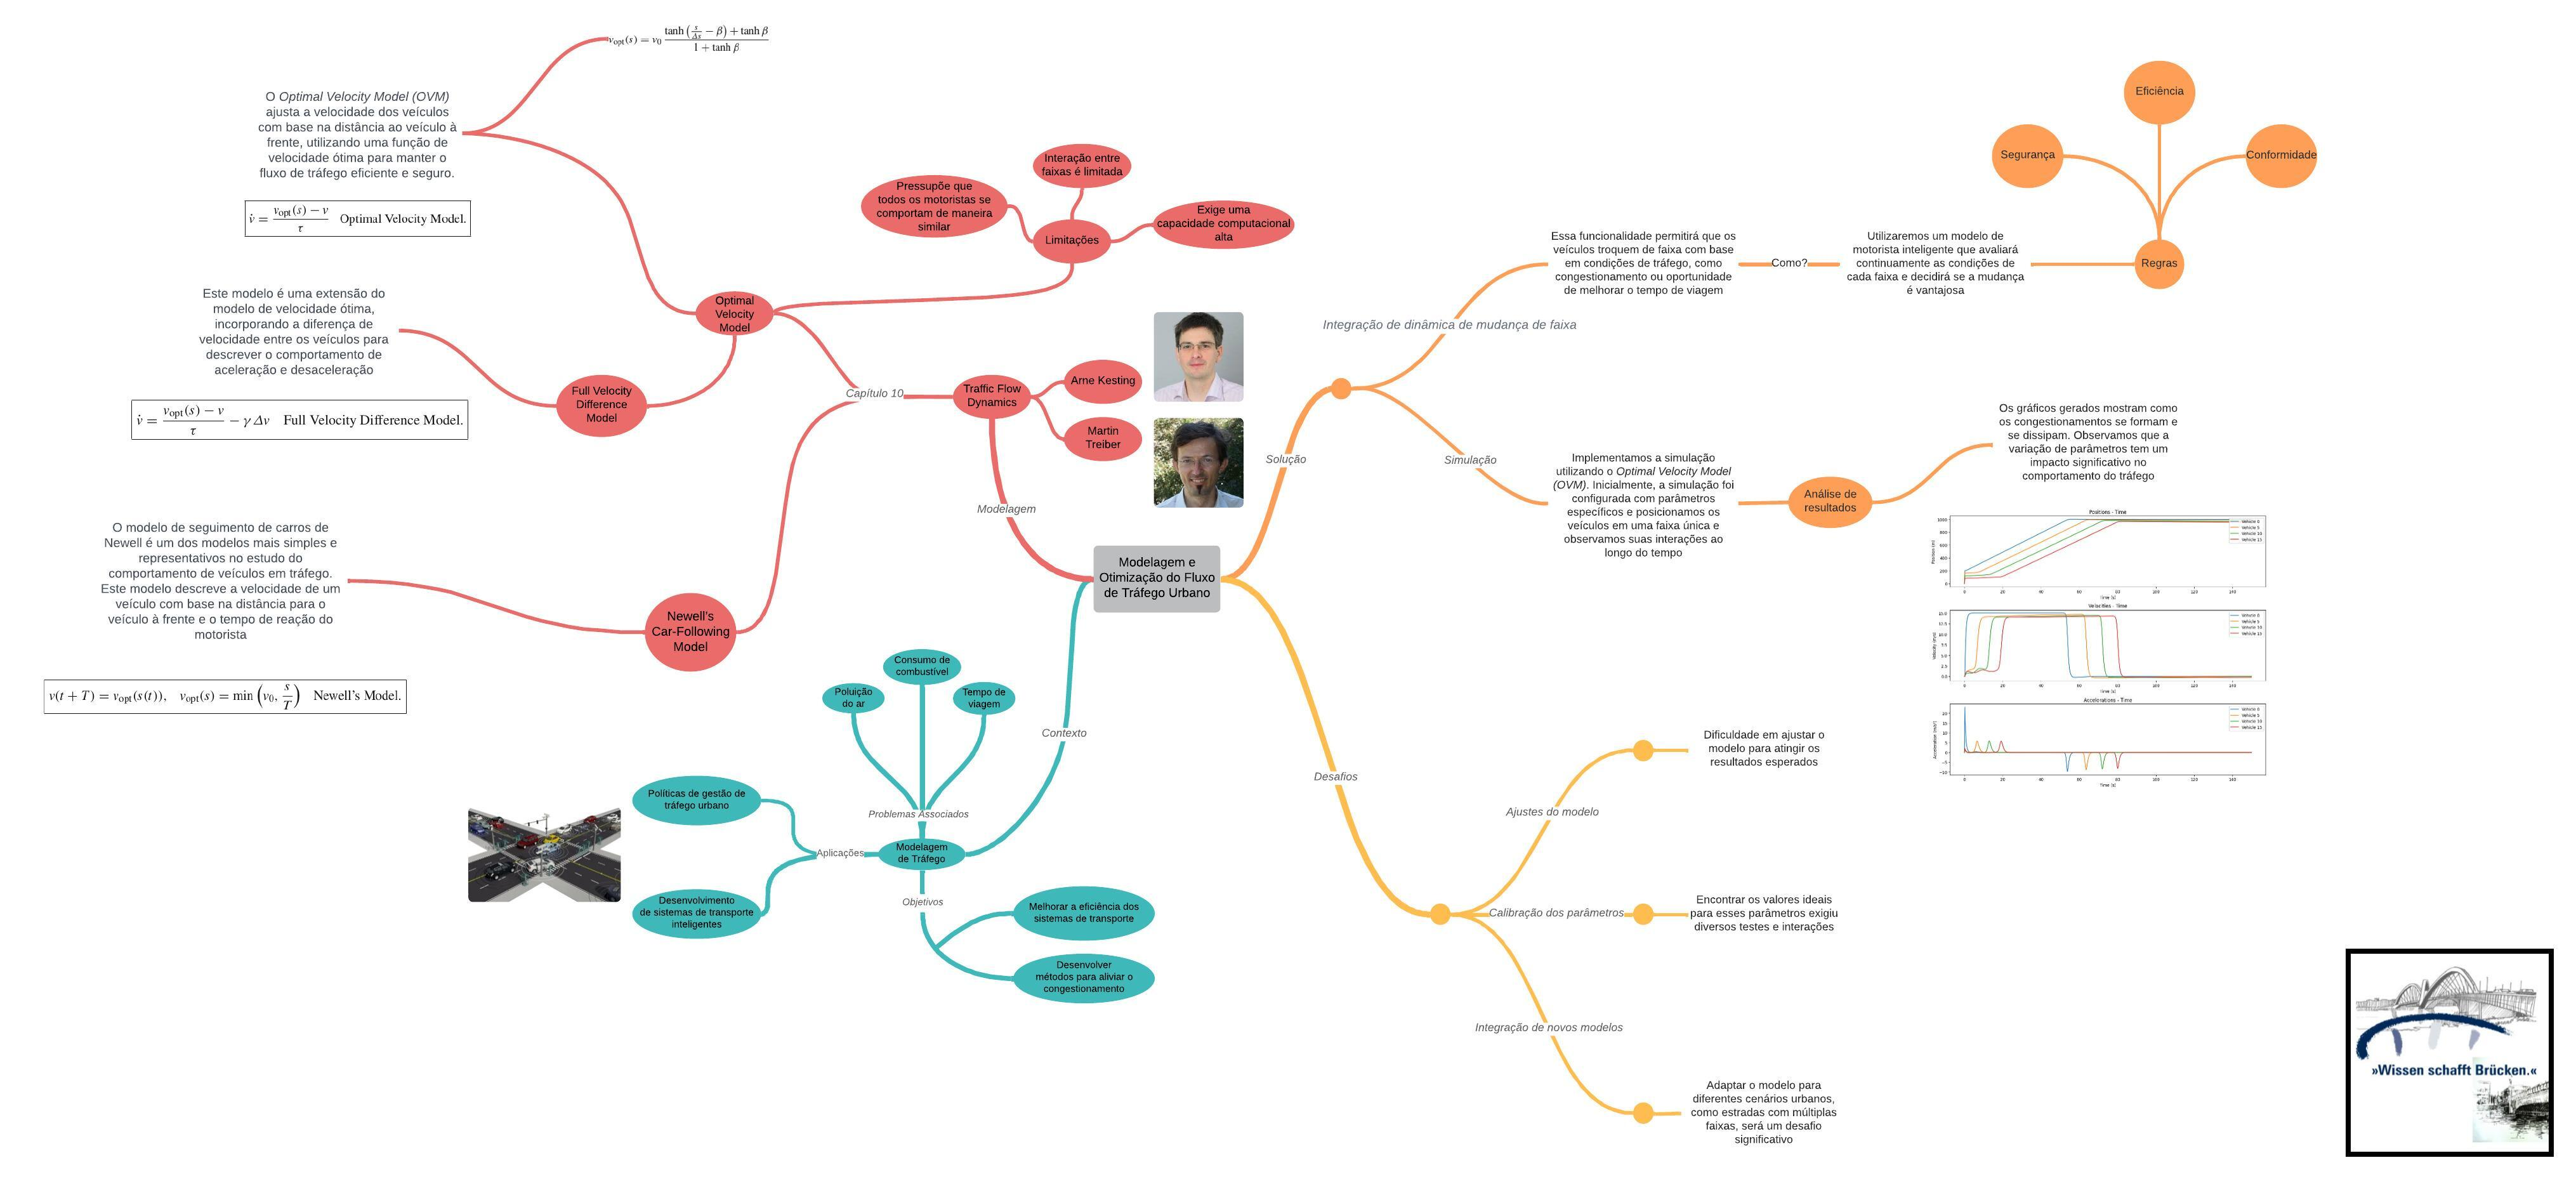

[LINK DO MAPA](https://lucid.app/lucidchart/cffd5819-8c0b-4bca-9cef-b05d17629839/edit?viewport_loc=628%2C560%2C2650%2C1032%2C0_0&invitationId=inv_2f4f57c0-06de-4141-9cb0-716c3565e813)

# **(III) Modelo**
---
## **Car-Following Models**
*Car-Following Models* são modelos matemáticos que descrevem o fluxo de veículos em ambientes urbanos ou rodoviários, utilizando uma abordagem microscópica para o movimento longitudinal que considera o comportamento individual de cada veículo em linha reta. Os primeiros modelos desse tipo foram desenvolvidos há mais de 70 anos por *Reuschel* (1950) e *Pipes* (1953). Esses modelos iniciais assumiam que a distância mínima entre os para-choques era proporcional à velocidade. No entanto, eles eram bastante limitados, pois não consideravam dinâmicas transversais e situações de escolha discreta, como a preparação para mudanças de faixa.

Nesses modelos, cada combinação motorista-veículo $\alpha$ é descrita pelas variáveis de estado posição $x_{\alpha}(t)$ (posição do para-choque dianteiro ao longo do comprimento do arco da estrada, aumentando na direção de condução) e velocidade $v_{\alpha}(t)$ como função do tempo $t$, além do atributo comprimento do veículo $l_{\alpha}$.

Os modelos mínimos (e muitos dos modelos mais realistas) descrevem a resposta do motorista como uma função do espaço $s_{\alpha}$ em relação ao veículo à frente, da velocidade do motorista $v_{\alpha}$, e da velocidade $v_{l}$ do veículo à frente. Em modelos de tempo contínuo, a resposta do motorista é dada diretamente em termos de uma função de aceleração $a_{\text{mic}}(s, v, v_{l})$, levando a um conjunto de equações diferenciais ordinárias acopladas da forma:

$$
\dot{x}_{\alpha}(t) = {v}_{\alpha}(t)
$$

$$
\dot{v}_{\alpha}(t) = {a}_{\text{mic}}(s_{\alpha}, v_{\alpha}, v_{l})
$$

$$
s_{\alpha} = x_{\alpha - 1} - l_{\alpha - 1} - x_{\alpha}
$$

Apesar de suas limitações, esses modelos fornecem uma base fundamental para modelos mais complexos. Um exemplo importante é o *Optimal Velocity Model (OVM)*, que incorpora atributos específicos como o tempo de reação do motorista, melhorando a precisão da modelagem do comportamento dos motoristas em diferentes condições de tráfego. Essa abordagem permite uma compreensão mais detalhada dos padrões de tráfego e serve como fundação para o desenvolvimento de modelos mais sofisticados, como o *Intelligent Driver Model (IDM)*.

## **Optimal Velocity Model**
O *OVM* trata das interações entre veículos, onde cada veículo ajusta sua velocidade baseada na distância para o veículo à frente, buscando uma velocidade ótima que minimiza a chance de colisão enquanto mantém um fluxo de tráfego eficiente. A função tangente hiperbólica $tanh$ desempenha um papel crucial no modelo, aplicada à diferença normalizada entre a distância atual e um parâmetro de transição $\Delta s$, subtraído por um fator $\beta$. Isso suaviza a transição da velocidade ótima, permitindo que os veículos ajustem suas velocidades de forma mais gradual e realista conforme a distância para o veículo à frente varia.

$$
\dot{v} = \frac{v_{\text{opt}}(s) - v}{\tau}
$$

$$
v_{\text{opt}}(s) = v_0 \frac{\tanh\left(\frac{s}{\Delta s} - \beta\right) + \tanh(\beta)}{1 + \tanh(\beta)}
$$

**Os parâmetros utilizados no modelo são:**
- $v_{\text{opt}}(s)$ - velocidade ótima como função da distância entre para-choques $s$. Esta função representa a velocidade que um veículo deve idealmente manter para evitar colisões e garantir um fluxo de tráfego eficiente.
- $\tau$ - tempo de adaptação, que determina a rapidez com que o veículo ajusta sua velocidade em resposta a mudanças na distância para o veículo à frente. Um $\tau$ menor significa que o veículo responde mais rapidamente.
- $​v_0$ - velocidade desejada, ou seja, a velocidade que os veículos tentam alcançar em condições ideais de tráfego, sem interferência de outros veículos.
- $\Delta s$ - largura de transição, que influencia a sensibilidade da velocidade ótima em relação à distância. Um valor maior para $\Delta s$ resultará em ajustes de velocidade mais suaves.
- $\beta$ - *form factor*, ajusta a inclinação da função de velocidade ótima, controlando quão rapidamente a velocidade desejada muda com a variação da distância.

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class OptimalVelocityModel:
    def __init__(self, tau=0.65, v0=15, delta_s=8, beta=1.5):
        self.tau = tau             # Adaptation time (s).
        self.v0 = v0               # Desired speed (m/s).
        self.delta_s = delta_s     # Transition width (m).
        self.beta = beta           # Form factor.

        self.num_vehicles = 20     # Number of vehicles.
        self.gap_distance = 8      # Initial inter-vehicle spacing (m).
        self.lane_length = 1000    # Lane length (m).

        self.dt = 1e-2             # Time step (s).
        self.sim_time = 100        # Total simulation time (s).

        # Set the length for each vehicle.
        self.v_length = np.random.uniform(4, 8, self.num_vehicles)

        # Last and first vehicle positions (m).
        xn = 50
        x1 = xn + self.gap_distance * (self.num_vehicles - 1)

        # Initial position (m), velocities (m/s) and accelerations (m/s²).
        self.x = np.linspace(x1, xn, self.num_vehicles)
        self.v = np.zeros(self.num_vehicles)
        self.a = np.zeros(self.num_vehicles)

    def s(self, alpha):
        # Calculate the distance between two vehicles.
        if alpha == 0:
            return self.lane_length - self.x[alpha]
        else:
            return self.x[alpha - 1] - self.v_length[alpha - 1] - self.x[alpha]

    def v_opt(self, s):
        # Calculate the optimal velocity.
        p = np.tanh(s / self.delta_s - self.beta)
        q = np.tanh(self.beta)
        return self.v0 * ((p + q) / (1 + q))

    def integrate(self):
        # Calculate the number of time steps.
        time_steps = int(self.sim_time / self.dt)
        positions = np.zeros((time_steps, self.num_vehicles))
        velocities = np.zeros((time_steps, self.num_vehicles))
        accelerations = np.zeros((time_steps, self.num_vehicles))

        # Integrate the model using the Euler method.
        for t in range(1, time_steps):
            for alpha in range(0, self.num_vehicles):
                s = self.s(alpha)
                self.x[alpha] = self.x[alpha] + self.v[alpha] * self.dt
                self.v[alpha] = self.v[alpha] + self.a[alpha] * self.dt
                self.a[alpha] = (self.v_opt(s) - self.v[alpha]) / self.tau

            # Store the positions, velocities and accelerations.
            positions[t, :] = self.x
            velocities[t, :] = self.v
            accelerations[t, :] = self.a

        # Return the positions, velocities and accelerations.
        return positions, velocities, accelerations

    def show(self, positions, velocities, accelerations):
        # Create a time array for the x-axis of the plots.
        time = np.arange(0, self.sim_time, self.dt)

        # Create three subplots: one for position, one for velocity and one for acceleration.
        fig, axs = plt.subplots(3, figsize=(12, 10))

        # Plot positions.
        axs[0].set_title('Positions - Time')
        axs[0].set_xlabel('Time (s)')
        axs[0].set_ylabel('Position (m)')

        for i in range(0, self.num_vehicles):
            if i % 5 == 0:
                axs[0].plot(time, positions[:, i], label=f'Vehicle {i}')

        # Add legend for positions plot.
        axs[0].legend(loc='upper right')

        # Plot velocities.
        axs[1].set_title('Velocities - Time')
        axs[1].set_xlabel('Time (s)')
        axs[1].set_ylabel('Velocity (m/s)')

        for i in range(0, self.num_vehicles):
            if i % 5 == 0:
                axs[1].plot(time, velocities[:, i], label=f'Vehicle {i}')

        # Add legend for velocities plot.
        axs[1].legend(loc='upper right')

        # Plot accelerations.
        axs[2].set_title('Accelerations - Time')
        axs[2].set_xlabel('Time (s)')
        axs[2].set_ylabel('Acceleration (m/s²)')

        for i in range(0, self.num_vehicles):
            if i % 5 == 0:
                axs[2].plot(time, accelerations[:, i], label=f'Vehicle {i}')

        # Add legend for accelerations plot.
        axs[2].legend(loc='upper right')

        # Display the plots.
        plt.tight_layout()
        plt.show()

## **Intelligent Driver Model**
O *IDM* é um dos *Car-Following Models* mais avançados e amplamente adotados para simular o comportamento de motoristas em diversas condições de tráfego. O IDM se distingue por incorporar uma gama mais ampla de fatores que influenciam as decisões dos motoristas, permitindo uma modelagem realista de situações cotidianas no trânsito, como a aceleração, frenagem e manutenção de distância segura em relação ao veículo à frente.

A aceleração $\dot{v}$ de um veículo no IDM é descrita pela seguinte equação:

$$
\dot{v} = a \left[ 1 - \left( \frac{v}{v_0} \right)^{\delta} - \left( \frac{s^*(v, \Delta v)}{s} \right)^2 \right]
$$

Aqui, a aceleração do veículo é influenciada por dois termos principais:
- O primeiro termo $\left( 1 - \left( \frac{v}{v_0} \right)^{\delta} \right)$ incentiva o veículo a acelerar até a velocidade desejada $v_0$.
- O segundo termo $\left( \frac{s^*(v, \Delta v)}{s} \right)^2$ atua como um fator de frenagem, que se torna mais significativo à medida que o veículo se aproxima de outro à frente.

A **distância dinâmica desejada** $s^*(v, \Delta v)$ é dada por:

$$
s^*(v, \Delta v) = s_0 + \max\left(0, vT + \frac{v \Delta v}{2\sqrt{ab}}\right)
$$

Essa fórmula incorpora tanto a distância mínima de segurança $s_0$ quanto o tempo de *headway* desejado $T$. O termo $\frac{v \Delta v}{2\sqrt{ab}}$ representa o ajuste necessário para manter uma distância segura ao se aproximar de um veículo mais lento.

**Os parâmetros utilizados no modelo são:**
- $v_0$ - velocidade alvo que o veículo tenta alcançar sob condições ideais de tráfego, ou seja, quando não há veículos à frente ou outros fatores limitantes. Esse parâmetro reflete o limite de velocidade ou a velocidade que o motorista considera confortável e seguro para dirigir. No IDM, o veículo ajusta sua aceleração para tentar atingir essa velocidade, desde que seja seguro fazê-lo.
- $a$ - taxa máxima de aceleração que o veículo pode atingir. Ele representa a capacidade do veículo de aumentar sua velocidade de forma eficiente. Uma aceleração mais alta significa que o veículo pode atingir a velocidade desejada mais rapidamente, mas deve ser equilibrada com o conforto e segurança dos ocupantes.
- $\delta$ - controla a sensibilidade da aceleração em resposta à diferença entre a velocidade atual e a velocidade desejada. Um valor maior de $\delta$ faz com que o veículo ajuste sua velocidade de maneira mais agressiva em relação à diferença de velocidade, enquanto um valor menor resulta em uma adaptação mais suave.
- $s_0$ - distância mínima que o veículo deve manter em relação ao veículo à frente, mesmo quando ambos estão parados. Essa distância é essencial para evitar colisões, garantindo uma margem de segurança suficiente em situações de emergência ou paradas bruscas.
- $T$ - tempo que o motorista deseja manter entre seu veículo e o veículo à frente, medido em segundos. Esse parâmetro é crucial para determinar a distância segura a ser mantida em movimento, ajudando a evitar colisões traseiras e permitindo uma frenagem segura. Um tempo de *headway* mais longo significa uma distância maior entre os veículos, proporcionando mais tempo para reagir a mudanças no tráfego.
- $b$ - taxa de desaceleração que o veículo pode suportar de maneira segura e confortável para os ocupantes. Esse parâmetro é utilizado no cálculo da frenagem segura, permitindo que o veículo reduza sua velocidade de forma gradual e controlada ao se aproximar de um veículo mais lento.

In [5]:
class IntelligentDriverModel:
    def __init__(self, v0=15, T=1, s0=2, delta=4, a=1, b=1.5):
        self.v0 = v0               # Desired speed (m/s).
        self.T = T                 # Time gap (s).
        self.s0 = s0               # Minimum gap (m).
        self.delta = delta         # Acceleration exponent.
        self.a = a                 # Acceleration (m/s²).
        self.b = b                 # Comfortable deceleration (m/s²).

        self.num_vehicles = 20     # Number of vehicles.
        self.gap_distance = 8      # Initial inter-vehicle spacing (m).
        self.lane_length = 1000    # Lane length (m).

        self.dt = 1e-2             # Time step (s).
        self.sim_time = 150        # Total simulation time (s).

        # Set the length for each vehicle.
        self.v_length = np.random.uniform(5, 5, self.num_vehicles)

        # Last and first vehicle positions (m).
        xn = 50
        x1 = xn + self.gap_distance * (self.num_vehicles - 1)

        # Initial position (m), velocities (m/s) and accelerations (m/s²).
        self.x = np.linspace(x1, xn, self.num_vehicles)
        self.v = np.zeros(self.num_vehicles)
        self.dvdt = np.zeros(self.num_vehicles)

    def s(self, alpha):
        # Calculate the distance between two vehicles.
        if alpha == 0:
            return self.lane_length - self.x[alpha]
        else:
            return self.x[alpha - 1] - self.v_length[alpha - 1] - self.x[alpha]

    def delta_v(self, alpha):
        # Calculate the relative velocity between vehicles.
        if alpha == 0:
            return abs(self.v[alpha])
        else:
            return abs(self.v[alpha - 1] - self.v[alpha])

    def s_star(self, alpha):
        # Calculate the desired distance between two vehicles.
        return self.s0 + max(0, self.v[alpha] * self.T + (self.v[alpha] * self.delta_v(alpha)) / (2 * np.sqrt(self.a * self.b)))

    def integrate(self):
        # Calculate the number of time steps.
        time_steps = int(self.sim_time / self.dt)
        positions = np.zeros((time_steps, self.num_vehicles))
        velocities = np.zeros((time_steps, self.num_vehicles))
        accelerations = np.zeros((time_steps, self.num_vehicles))
        gaps = np.zeros((time_steps, self.num_vehicles))

        # Integrate the model using the Euler method.
        for t in range(1, time_steps):
            for alpha in range(0, self.num_vehicles):
                s = self.s(alpha)
                s_star = self.s_star(alpha)
                self.x[alpha] = self.x[alpha] + self.v[alpha] * self.dt
                self.v[alpha] = max(0, self.v[alpha] + self.dvdt[alpha] * self.dt)
                self.dvdt[alpha] = self.a * (1 - (self.v[alpha] / self.v0)**self.delta - (s_star / s)**2)
                gaps[t, alpha] = s

            # Store the positions, velocities and accelerations.
            positions[t, :] = self.x
            velocities[t, :] = self.v
            accelerations[t, :] = self.dvdt
            gaps[t, :] = gaps[t, :]

        # Return the positions, velocities and accelerations.
        return positions, velocities, accelerations, gaps

    def show(self, positions, velocities, accelerations, gaps):
        # Create a time array for the x-axis of the plots.
        time = np.arange(0, self.sim_time, self.dt)

        # Create three subplots: one for position, one for velocity and one for acceleration.
        fig, axs = plt.subplots(4, figsize=(12, 10))

        # Plot gaps.
        axs[0].set_title('Gaps - Time')
        axs[0].set_xlabel('Time (s)')
        axs[0].set_ylabel('Gap (m)')
        axs[0].set_ylim(0, 80)
        axs[0].set_xticks(np.arange(0, self.sim_time + 1, 30))

        for i in range(0, self.num_vehicles):
            if i % 5 == 0:
                axs[0].plot(time, gaps[:, i], label=f'Vehicle {i}')

        # Add legend for gaps plot.
        axs[0].legend(loc='upper right')

        # Plot velocities.
        axs[1].set_title('Velocities - Time')
        axs[1].set_xlabel('Time (s)')
        axs[1].set_ylabel('Velocity (m/s)')
        axs[1].set_xticks(np.arange(0, self.sim_time + 1, 30))

        for i in range(0, self.num_vehicles):
            if i % 5 == 0:
                axs[1].plot(time, velocities[:, i], label=f'Vehicle {i}')

        # Add legend for velocities plot.
        axs[1].legend(loc='upper right')

        # Plot accelerations.
        axs[2].set_title('Accelerations - Time')
        axs[2].set_xlabel('Time (s)')
        axs[2].set_ylabel('Acceleration (m/s²)')
        axs[2].set_xticks(np.arange(0, self.sim_time + 1, 30))
        for i in range(0, self.num_vehicles):
            if i % 5 == 0:
                axs[2].plot(time, accelerations[:, i], label=f'Vehicle {i}')

        # Add legend for accelerations plot.
        axs[2].legend(loc='upper right')

        # Plot positions.
        axs[3].set_title('Positions - Time')
        axs[3].set_xlabel('Time (s)')
        axs[3].set_ylabel('Position (m)')
        axs[3].set_xticks(np.arange(0, self.sim_time + 1, 30))

        for i in range(0, self.num_vehicles):
            if i % 5 == 0:
                axs[3].plot(time, positions[:, i], label=f'Vehicle {i}')

        # Add legend for positions plot.
        axs[3].legend(loc='upper right')

        # Display the plots.
        plt.tight_layout()
        plt.show()

## **Método Numérico**
No método `integrate` das classes `OptimalVelocityModel` e `IntelligentDriverModel`, o método de *Euler* é utilizado para simular a dinâmica dos veículos ao longo do tempo. As fórmulas de atualização da posição e velocidade são:

$$
x_{n+1} = x_n + v \, dt \\
v_{n+1} = v_n + a_{\text{mic}} \, dt \\
$$

Esse método é aplicado iterativamente para cada veículo, atualizando as posições e velocidades conforme as equações do modelo escolhido, seja o *Optimal Velocity Model* ou o *Intelligent Driver Model*. Essa abordagem permite a simulação do fluxo de tráfego em diferentes condições e configurações.

# **(IV) Resultados e Discussões**
---

## **Optimal Velocity Model**

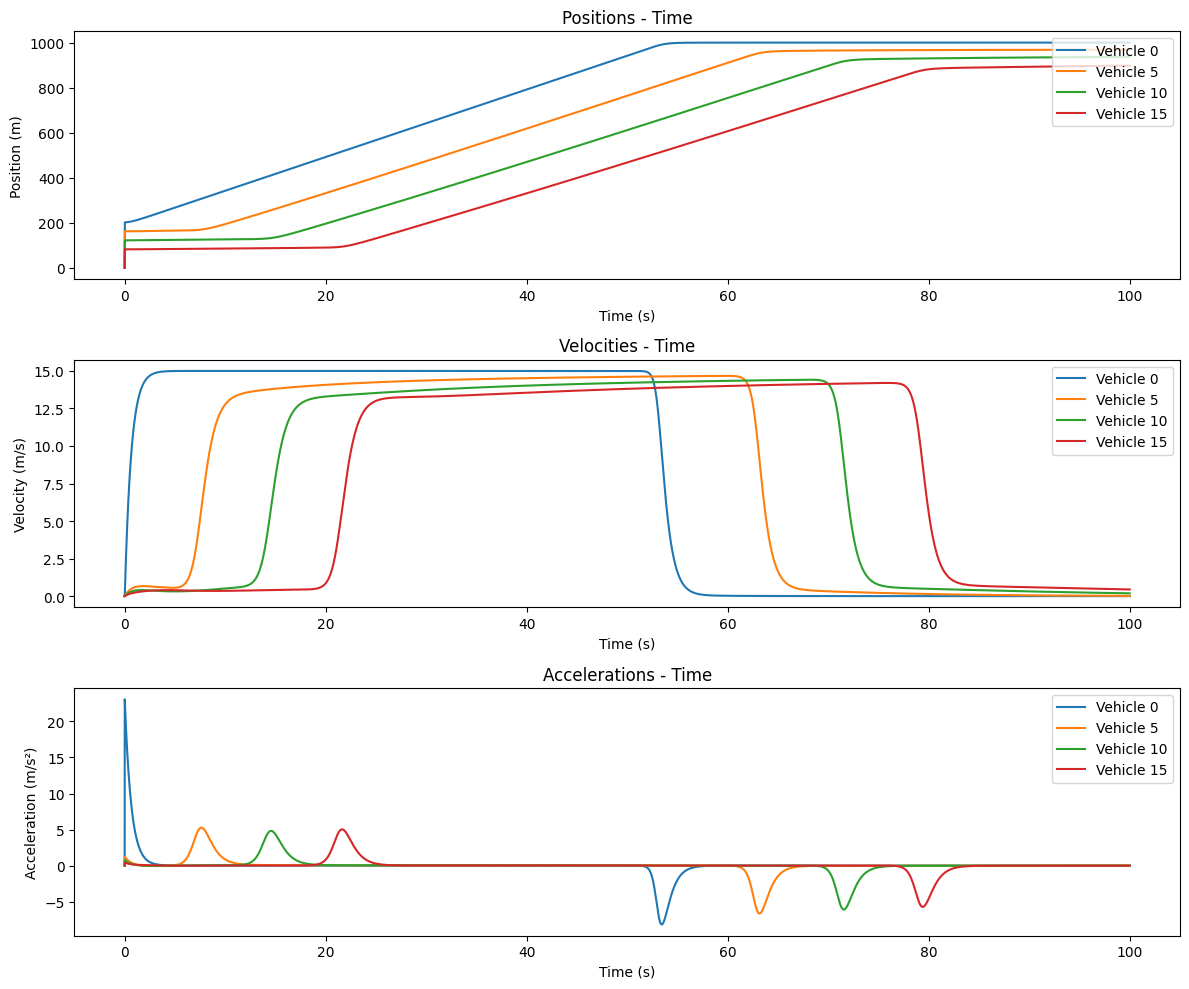

In [6]:
ovm = OptimalVelocityModel()
positions, velocities, accelerations = ovm.integrate()
ovm.show(positions, velocities, accelerations)

Os gráficos apresentados mostram as posições, velocidades e acelerações de quatro veículos (`Vehicle 0`, `Vehicle 5`, `Vehicle 10` e `Vehicle 15`) ao longo do tempo. A análise desses resultados revela alguns comportamentos interessantes e algumas inconsistências que devem ser abordadas.

Observando o gráfico de posições ao longo do tempo, notamos que os veículos começam a se mover em tempos ligeiramente diferentes, o que é esperado em um cenário de tráfego. Todos os veículos atingem a mesma posição final, indicando que estão seguindo uma mesma rota, mas com diferentes velocidades iniciais. O gráfico de velocidades ao longo do tempo mostra que as velocidades dos veículos aumentam inicialmente, atingem um valor máximo e depois diminuem até parar. As diferenças no tempo em que cada veículo atinge sua velocidade máxima refletem variações na aceleração inicial. No entanto, o gráfico de acelerações ao longo do tempo apresenta algumas irregularidades notáveis.

As acelerações iniciais são bastante bruscas, especialmente para o `Vehicle 0`, o que é fisicamente improvável para um veículo real. Essas acelerações extremas podem ser resultado de simplificações ou suposições no modelo atual. Além disso, as desacelerações bruscas observadas nos veículos ao final do período de aceleração não são típicas do comportamento de veículos reais, que normalmente desaceleram de maneira mais gradual e controlada, considerando a segurança e o conforto dos passageiros.

## **Intelligent Driver Model**

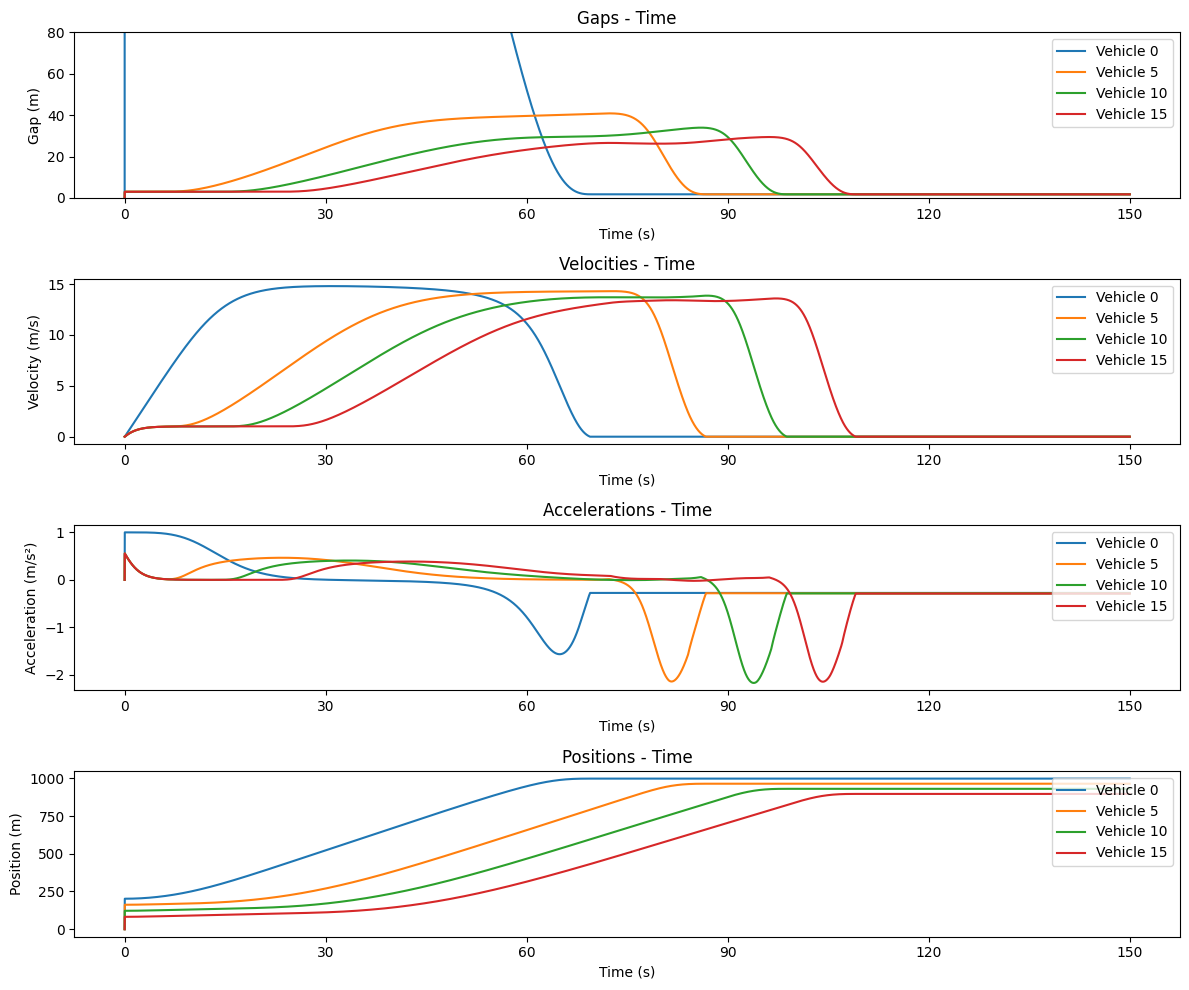

In [7]:
idm = IntelligentDriverModel()
positions, velocities, accelerations, gaps = idm.integrate()
idm.show(positions, velocities, accelerations, gaps)

Os gráficos acima ilustram as posições, velocidades, acelerações e *gaps* de quatro veículos (`Vehicle 0`, `Vehicle 5`, `Vehicle 10` e `Vehicle 15`) ao longo do tempo, modelados pelo Intelligent Driver Model (IDM).

No gráfico de posições ao longo do tempo, observamos que os veículos começam a se mover em tempos diferentes, mas todos seguem trajetórias suaves e atingem a mesma posição final, sugerindo uma rota compartilhada, porém com diferentes condições iniciais. Os gráficos de velocidade mostram que, diferentemente do cenário anterior, as velocidades atingem um pico antes de começar a decrescer de forma mais suave. Isso sugere que os veículos estão seguindo um padrão de aceleração e desaceleração que respeita limites de segurança, como seria esperado em um modelo IDM, onde a dinâmica do tráfego é mais controlada.

O gráfico de acelerações ao longo do tempo revela que as acelerações e desacelerações são menos bruscas em comparação com o cenário anterior, especialmente para o `Vehicle 0`. Este comportamento é mais realista e condiz com o que se esperaria de um modelo de condução inteligente, onde as forças aplicadas ao veículo são controladas para evitar movimentos abruptos e garantir o conforto dos passageiros. Entretanto, ainda há algumas oscilações nas curvas de aceleração que podem ser atribuídas a interações complexas entre os veículos e a resposta do modelo a diferentes condições de tráfego.

Por fim, o gráfico de gaps (distâncias) entre os veículos ao longo do tempo mostra que as distâncias entre os veículos variam, mas são mantidas dentro de limites seguros, refletindo o objetivo do IDM de manter um fluxo de tráfego seguro e eficiente. Observa-se que os gaps aumentam gradualmente conforme os veículos desaceleram, o que ajuda a prevenir colisões e manter uma distância segura entre eles.

Esse conjunto de gráficos destaca o potencial do IDM em simular cenários de tráfego realistas, com maior ênfase na segurança e no conforto dos passageiros, além de uma distribuição mais suave das acelerações e velocidades.

# **(V) Conclusões**
---
Neste projeto, exploramos a modelagem e otimização do fluxo de tráfego urbano utilizando dois modelos principais: o *Optimal Velocity Model (OVM)* e o *Intelligent Driver Model (IDM)*. Através de simulações numéricas, analisamos como diferentes parâmetros influenciam o comportamento do tráfego e investigamos estratégias para reduzir congestionamentos. As lições aprendidas e os conhecimentos adquiridos durante este estudo são multifacetados e podem ser sumarizados nos seguintes pontos principais:

- **Impacto dos Parâmetros no Fluxo de Tráfego (OVM e IDM):** Tanto no OVM quanto no IDM, parâmetros como a *velocidade desejada* ($\ v_0$), a *largura de transição* ($\Delta s$), o *tempo de adaptação* ($\tau$), e a *distância segura* entre veículos mostraram-se cruciais para o comportamento do tráfego. Ajustes nesses parâmetros podem influenciar diretamente a formação e dissolução de congestionamentos. Por exemplo, no OVM, um aumento na velocidade máxima pode melhorar o fluxo em condições de tráfego leve, mas pode agravar congestionamentos em situações de tráfego pesado. Já no IDM, o controle inteligente das acelerações e desacelerações demonstrou ser eficaz em manter o fluxo de tráfego de forma mais estável e segura, especialmente em situações de alta densidade.

- **Comparação entre OVM e IDM:** Ao comparar os dois modelos, observamos que o IDM proporciona uma simulação mais realista, com acelerações e desacelerações mais suaves, refletindo uma condução mais segura e confortável. O IDM é particularmente eficiente na manutenção de distâncias seguras entre os veículos, o que contribui para a prevenção de acidentes e a otimização do fluxo de tráfego, especialmente em cenários urbanos complexos.

- **Relevância para Políticas de Gestão de Tráfego:** Os conhecimentos obtidos a partir deste estudo são valiosos para o desenvolvimento de sistemas de transporte inteligentes e a formulação de políticas de gestão de tráfego. Entender como diferentes fatores influenciam o fluxo de tráfego pode ajudar os planejadores urbanos a tomar decisões mais informadas e a implementar medidas mais eficazes para mitigar congestionamentos. O IDM, em particular, oferece ferramentas práticas para a implementação de políticas de gestão que priorizem a segurança e a eficiência do tráfego.

Em resumo, este projeto nos proporcionou uma compreensão mais profunda das dinâmicas do tráfego urbano e demonstrou a importância de modelagem e simulação no desenvolvimento de estratégias para a otimização do fluxo de tráfego. As lições aprendidas, tanto do OVM quanto do IDM, não apenas contribuem para o avanço acadêmico, mas também têm implicações práticas significativas para a gestão de tráfego em ambientes urbanos, preparando o terreno para futuras melhorias e inovações na área.